MARÇAL Thomas

--------------------------- 

GROUPE :     
- MARÇAL Thomas
- KOSKAS Axel
- GOSSELIN Julie
- KERMEL Aurore
- CHEPETKINE Alexandre

-----------------------------------

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pylab as plt 
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler

In [2]:
import plotly.io as pio
pio.renderers.default = "colab"

In this assignment you have tree dataset : 

* World happiness Dataset of the evolution of happiness beetween 2015 and 2021 (the 2022 csv is corrupted)

* World population dataset of the evolution of population by country 

* Kaggle Survey dataset which is a dataset of Q&A about Kaggle user.

The objective of this work is to analyse the data, make a lot of plot and try to find correlation beetween the data of datasets. Don't hesitate to make aggregation with clustering on the country to have a more representative sampling.

Start by working on each dataset during the first 1h30 and then try to correlate the data beetween the datasets.

For example a question could be : 

does exist a link beetween the kaggle participation and happiness  of the country? 

# World Happiness Dataset

---



## Context

The World Happiness Report may be a point of interest survey of the state of worldwide bliss. The primary report was distributed in 2012, the second in 2013, the third in 2015, and the fourth within the 2016 Upgrade. The World Joy 2017, which positions 155 nations by their bliss levels, was discharged at the Joined together Countries at an occasion celebrating Universal Day of Joy on Walk 20th. The report proceeds to pick up worldwide acknowledgment as governments, organizations and respectful society progressively utilize joy pointers to educate their policy-making choices. Driving specialists over areas – financial matters, brain research, overview investigation, national insights, wellbeing, open approach and more – depict how estimations of well-being can be used effectively to evaluate the advance of countries. The reports survey the state of bliss within the world nowadays and appear how the modern science of bliss clarifies individual and national varieties in bliss.

## Content

The joy scores and rankings utilize information from the Gallup World Survey. The scores are based on answers to the most life evaluation address inquired within the survey. This address, known as the Cantril step, asks respondents to think of a step with the most excellent conceivable life for them being a 10 and the most exceedingly bad conceivable life being a and to rate their claim current lives on that scale. The scores are from broadly agent tests for the a long time 2013-2016 and utilize the Gallup weights to create the gauges agent. The columns taking after the bliss score assess the degree to which each of six variables – financial generation, social back, life anticipation, flexibility, nonattendance of debasement, and liberality – contribute to making life assessments higher in each nation than they are in Dystopia, a theoretical nation that has values rise to to the world’s least national midpoints for each of the six variables. They have no affect on the full score detailed for each nation, but they do exp

This file contains the Happiness Score for 153 countries along with the factors used to explain the score.

The Happiness Score is a national average of the responses to the main life evaluation question asked in the Gallup World Poll (GWP), which uses the Cantril Ladder.

The Happiness Score is explained by the following factors:

* GDP per capita
* Healthy Life Expectancy
* Social support
* Freedom to make life choices
* Generosity
* Corruption Perception
* Residual error

The data is described in much more detail here: link

## Acknowledgements
I did not create this data, only sourced it. The credit goes to the original Authors:

Editors: John Helliwell, Richard Layard, Jeffrey D. Sachs, and Jan Emmanuel De Neve, Co-Editors; Lara Aknin, Haifang Huang and Shun Wang, Associate Editors; and Sharon Paculor, Production Editor

## Citation:
Helliwell, John F., Richard Layard, Jeffrey Sachs, and Jan-Emmanuel De Neve, eds. 2020. World Happiness Report 2020. New York: Sustainable Development Solutions Network

In [3]:
!unzip world_happiness.zip

Archive:  world_happiness.zip
  inflating: 2015.csv                
  inflating: 2016.csv                
  inflating: 2017.csv                
  inflating: 2018.csv                
  inflating: 2019.csv                
  inflating: 2020.csv                
  inflating: 2021.csv                
  inflating: 2022.csv                


Tip's :  don't use the 2022 because data are not well formatted

In [4]:
world_happiness = {}

happines_years = list(range(2015,2022))

for k in happines_years:
    world_happiness[k] = pd.read_csv('%d.csv'%k)

we check the columns name ... each csv have different collumn name... 

In [5]:
for y in happines_years:
    print(y, world_happiness[y].columns)

2015 Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
2016 Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')
2017 Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')
2018 Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expe

## Sample :  extraction of happiness score for France : 

In [6]:
score_columns = ['Happiness Score','Happiness Score','Happiness.Score', 'Score', 'Score', 'Ladder score', 'Ladder score']
country_col = ['Country','Country','Country','Country or region','Country or region','Country name','Country name']

In [7]:
fr_happiness_evolution = []

for y, ind,cnt in zip(happines_years, score_columns,country_col):
    fr_happiness_evolution.append( (world_happiness[y][world_happiness[y][cnt]=='France'][ind]))


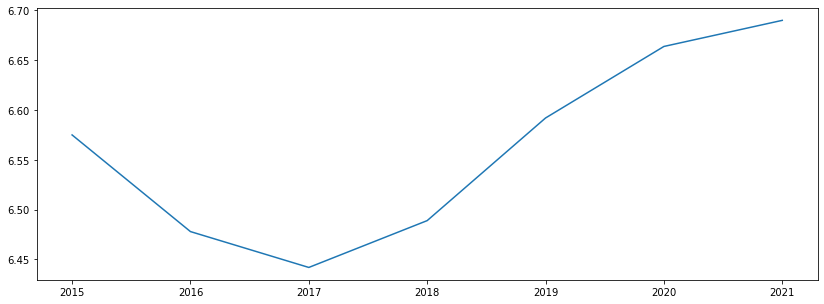

In [8]:
plt.figure(figsize=(14,5))
plt.plot(happines_years, fr_happiness_evolution)

##Données concernant le score de bonheur

***Nettoyage de la data base sur le score de bonheur:***

In [9]:
happy2015 = world_happiness[2015]
happy2015['Year'] = 2015 

happy2016 = world_happiness[2016]
happy2016['Year'] = 2016

happy2017 = world_happiness[2017]
happy2017 = happy2017.rename(columns = {'Happiness.Rank':'Happiness Rank', 'Happiness.Score' : 'Happiness Score', 
                                      'Economy..GDP.per.Capita.' : 'Economy (GDP per Capita)', 'Health..Life.Expectancy.' : 'Health (Life Expectancy)',
                                      'Trust..Government.Corruption.' : 'Trust (Government Corruption)', 'Dystopia.Residual' : 'Dystopia Residual'})
happy2017['Year'] = 2017 


happy2018 = world_happiness[2018]
happy2018 = happy2018.rename(columns = {'Overall rank':'Happiness Rank', 'Country or region' : 'Country', 'Score' : 'Happiness Score',
                                      'GDP per capita' : 'Economy (GDP per Capita)', 'Social support' : 'Family',
                                      'Healthy life expectancy' : 'Health (Life Expectancy)','Freedom to make life choices' : 'Freedom',
                                      'Perceptions of corruption' : 'Trust (Government Corruption)'})
happy2018['Year'] = 2018


happy2019 = world_happiness[2019]
happy2019 = happy2019.rename(columns = {'Overall rank':'Happiness Rank', 'Country or region' : 'Country', 'Score' : 'Happiness Score',
                                      'GDP per capita' : 'Economy (GDP per Capita)', 'Social support' : 'Family',
                                      'Healthy life expectancy' : 'Health (Life Expectancy)','Freedom to make life choices' : 'Freedom'
                                     , 'Perceptions of corruption' : 'Trust (Government Corruption)'})
happy2019['Year'] = 2019 

happy2020 = world_happiness[2020]
happy2020['Happiness Rank'] =  range(1, len(happy2020.index)+1)
happy2020 = happy2020.rename(columns = {'Country name' : 'Country', 'Ladder score' : 'Happiness Score', 
                                        'Regional indicator' : 'Region',
                                      'Logged GDP per capita' : 'Economy (GDP per Capita)', 'Social support' : 'Family', 'Healthy life expectancy' : 'Health (Life Expectancy)',
                                      'Freedom to make life choices' : 'Freedom', 'Perceptions of corruption' : 'Trust (Government Corruption)'})
happy2020['Year'] = 2020 


happy2021 = world_happiness[2021]
happy2021['Happiness Rank'] =  range(1, len(happy2021.index)+1)
happy2021 = happy2021.rename(columns = {'Country name' : 'Country', 'Ladder score' : 'Happiness Score', 
                                        'Regional indicator' : 'Region',
                                      'Logged GDP per capita' : 'Economy (GDP per Capita)', 'Social support' : 'Family', 'Healthy life expectancy' : 'Health (Life Expectancy)',
                                      'Freedom to make life choices' : 'Freedom', 'Perceptions of corruption' : 'Trust (Government Corruption)'})
happy2021['Year'] = 2021

In [10]:
happy2019.head()

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Year
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019


In [11]:
happy2020.head()

,Country,Region,Happiness Score,Standard error of ladder score,upperwhisker,lowerwhisker,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,...,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Happiness Rank,Year
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,...,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835,1,2020
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,...,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741,2,2020
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,...,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267,3,2020
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,...,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688,4,2020
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,...,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266,5,2020


On remarque que pour les années 2020 et 2021 les valeurs étaient multipliées par 10, ce qui n'est pas raccord avec la situation mondial de l'époque

In [12]:
#PIB
happy2020['Economy (GDP per Capita)']=happy2020['Economy (GDP per Capita)']/10
happy2021['Economy (GDP per Capita)']=happy2021['Economy (GDP per Capita)']/10
#Esperance de vie
happy2020['Health (Life Expectancy)']=happy2020['Health (Life Expectancy)']/100
happy2021['Health (Life Expectancy)']=happy2021['Health (Life Expectancy)']/100

Voici les colonnes sur lesquelles nous allons travailler après nettoyage :

In [13]:
print(happy2015.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Year'],
      dtype='object')


On remarque que les données de 2018 et 2019 n'ont pas de colonne région. Nous allons donc en ajouter une grâce aux données des années antérieures.

In [14]:
world_happiness[2019]['Country or region'].unique()

array(['Finland', 'Denmark', 'Norway', 'Iceland', 'Netherlands',
       'Switzerland', 'Sweden', 'New Zealand', 'Canada', 'Austria',
       'Australia', 'Costa Rica', 'Israel', 'Luxembourg',
       'United Kingdom', 'Ireland', 'Germany', 'Belgium', 'United States',
       'Czech Republic', 'United Arab Emirates', 'Malta', 'Mexico',
       'France', 'Taiwan', 'Chile', 'Guatemala', 'Saudi Arabia', 'Qatar',
       'Spain', 'Panama', 'Brazil', 'Uruguay', 'Singapore', 'El Salvador',
       'Italy', 'Bahrain', 'Slovakia', 'Trinidad & Tobago', 'Poland',
       'Uzbekistan', 'Lithuania', 'Colombia', 'Slovenia', 'Nicaragua',
       'Kosovo', 'Argentina', 'Romania', 'Cyprus', 'Ecuador', 'Kuwait',
       'Thailand', 'Latvia', 'South Korea', 'Estonia', 'Jamaica',
       'Mauritius', 'Japan', 'Honduras', 'Kazakhstan', 'Bolivia',
       'Hungary', 'Paraguay', 'Northern Cyprus', 'Peru', 'Portugal',
       'Pakistan', 'Russia', 'Philippines', 'Serbia', 'Moldova', 'Libya',
       'Montenegro', 'Tajikis

On récupère le om des régions associées aux différents pays du dataset

In [15]:
pays_reg=pd.concat([happy2015,happy2016,happy2017,happy2020,happy2021])
pays_reg=pays_reg[['Country','Region']]
pays_reg=pays_reg.drop_duplicates(subset = "Country")
pays_reg

,Country,Region
0,Switzerland,Western Europe
1,Iceland,Western Europe
2,Denmark,Western Europe
3,Norway,Western Europe
4,Canada,North America
...,...,...
70,"Hong Kong S.A.R., China",NaN
77,Hong Kong S.A.R. of China,East Asia
86,Maldives,South Asia
112,Gambia,Sub-Saharan Africa


On remplit happy2018 et happy2019 avec les regions trouvées.

In [16]:
happy2018=pd.merge(happy2018,pays_reg,on="Country")
happy2018

happy2019=pd.merge(happy2019,pays_reg,on="Country")

*On regroupe toutes les "happyannée" dans le but de plot des graphiques*

Nous avons maintenant des données d'un même ordre de grandeur mais toutes séparées par année. Nous allons donc les regrouper en un seul dataframe pour pouvoir tracer des graphes comparatifs et évolutifs.

In [17]:
happytot=pd.concat([happy2015,happy2016,happy2017,happy2018,happy2019,happy2020,happy2021])


***Voyons voir comment se répartie le score de bonheur en fonction des pays dans le monde.***

In [18]:
carte_bonheur = px.choropleth(happytot, locations="Country", 
                    color=happytot["Happiness Score"],
                    locationmode='country names', hover_name="Country", 
                    animation_frame=happytot["Year"],
                    title='Score de bonheur par pays en fonction des années', color_continuous_scale=px.colors.sequential.matter)
carte_bonheur.show()

Après observation de la carte, on suppose que l'on peut regrouper les pays par région.

In [19]:
#Average value of happiness variable for different regions
#Tracé des moyennes
happymoy=happytot[["Country","Happiness Score"]].groupby("Country").mean()
happymoy=happymoy.merge(pays_reg,right_on="Country",left_index=True)
happymoy=happymoy.dropna()

In [20]:
fig=px.scatter(happymoy,x="Region",y="Happiness Score",color="Region",hover_name="Country")
fig.show()

In [21]:
fig=px.box(happymoy,x="Region",y="Happiness Score",color="Region",points="all")
fig.show()

Il est plutot aisé de correler le taux de developpement de la zone géographique avec le bonheur moyen: les pays les plus developpés sont globalement plus heureux. Mais il est interessant de noter que des zones géographiques avec des taux de developpement et des moyens differents obtiennent des scores moyens de bonheur très similaires. La notion de bonheur serait donc variable en fonction des endroits.

Dans un premier temps nous voulons observer si lien il y a entre le score de bonheur et toutes les colones de la data base de happy.

In [22]:
fig = px.scatter(happytot, x='Happiness Score', y='Economy (GDP per Capita)', animation_frame="Year", 
                 color = 'Economy (GDP per Capita)',
                 title='PIB en fonction du score de bonheur par région du monde, en fonction des années', hover_name='Country',
                 trendline="ols")
fig.update(layout_coloraxis_showscale=False)
fig.show()

On remarque pour des scores de bonheur faible à moyen, la corrélation entre le PIB par capitale et le bonheur est plutôt faible. En effet, pour le même PIB on peut observer un score de bonheur de 5 et 2.8

Par contre nous pouvons remarquer qu'au fil des années le score de bonheur tend à augmenter grâce au nuage de point que l'on voit se déplacer vers la droite. Vérifions cette information avec un histogramme de nombre de pays ayant un score de bonheur compris 

In [23]:
fig = px.histogram(happytot, x="Happiness Score", nbins=20, animation_frame="Year",marginal='box')
fig.show()

In [24]:
fig = px.scatter(happytot, x='Happiness Score', y='Family', animation_frame="Year", 
                 color = 'Family',
                 title='Nombre d enfants en fonction du score de bonheur par région du monde, en fonction des années', hover_name='Country',
                 trendline="ols")
fig.update(layout_coloraxis_showscale=False)
fig.show()

In [25]:
fig = px.scatter(happytot, x='Happiness Score', y='Health (Life Expectancy)', animation_frame="Year", 
                 color = 'Health (Life Expectancy)',
                 title='Espérance de vie en fonction du score de bonheur par région du monde, en fonction des années', hover_name='Country',
                 trendline="ols")
fig.update(layout_coloraxis_showscale=False)
fig.show()

In [26]:
fig = px.scatter(happytot, x='Happiness Score', y='Freedom', animation_frame="Year", 
                 color = 'Freedom',
                 title='Libérté de choix en fonction du score de bonheur par région du monde, en fonction des années',
                 hover_name='Country',
                 trendline="ols")
fig.update(layout_coloraxis_showscale=False)
fig.update_yaxes(range=[0, 1])
fig.show()

In [27]:
fig = px.scatter(happytot, x='Happiness Score', y='Trust (Government Corruption)', animation_frame="Year", 
                 color = 'Trust (Government Corruption)',
                 title='Confiance en son gouvenement en fonction du score de bonheur par région du monde, en fonction des années', hover_name='Country',
                 trendline="ols")
fig.update(layout_coloraxis_showscale=False)
fig.update_yaxes(range=[0, 1])
fig.show()

Le soudain bond dans les valeurs de confiance correspond aux dates de la pandémie mais il ne semble pas justifié par rapport à l'attitude des individus pendant le covid.

In [28]:
import plotly.io as pio
pio.renderers.default = "colab"

In [29]:
fig = px.scatter(happytot, x='Happiness Score', y='Generosity', animation_frame="Year", 
                 color = 'Generosity',
                 title='Générosité en fonction du score de bonheur par région du monde, en fonction des années', hover_name='Country',
                 trendline="ols")
fig.update(layout_coloraxis_showscale=False)
fig.update_yaxes(range=[-0.5, 1])
fig.show()

In [30]:
import plotly.io as pio
pio.renderers.default = "colab"

In [31]:
fig = px.scatter(happytot, x='Happiness Score', y='Dystopia Residual', animation_frame="Year", 
                 color = 'Dystopia Residual',
                 title='Dystopia Residual en fonction du score de bonheur par région du monde, en fonction des années', hover_name='Country',
                 trendline="ols")
fig.update(layout_coloraxis_showscale=False)
fig.show()

Les graphiques sont difficilement lisibles pour certaines catégories. De plus, les régressions linéaires effectuées pour chaque nuage de point ne sont pas forcément pertinentes. 
(Nous pouvons quand même observer que pour 2020 & 2021, "période covid", la confiance en son gouvernement ainsi que la liberté ont fortement augmentés)

Ainsi,nous allons tenter d'obtenir une meilleure compréhension  à l'aide d'une matrice de corrélation.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



Text(0.5, 1.0, 'Corrélation entre tous les paramètres, pour 2015')

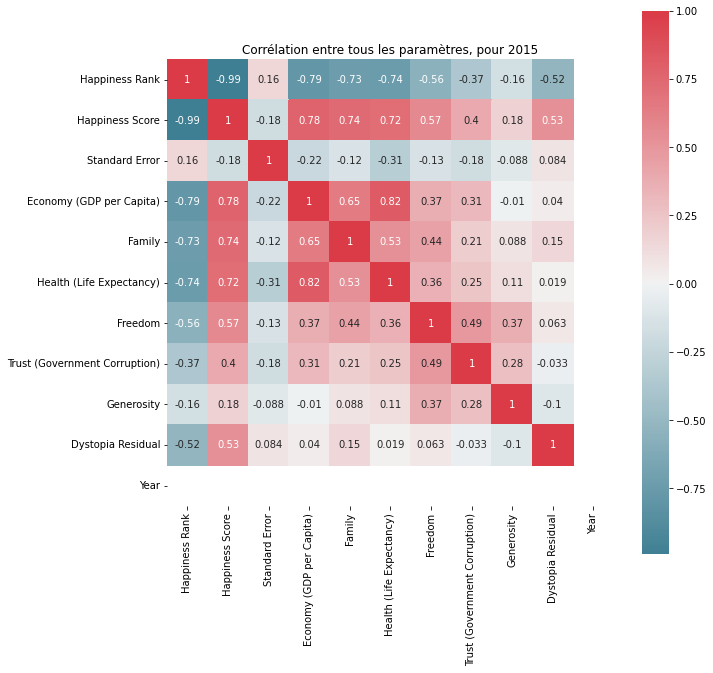

In [32]:
corr = happy2015.corr(method = "pearson")

f, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(corr, annot = True,mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)

plt.title('Corrélation entre tous les paramètres, pour 2015')




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



Text(0.5, 1.0, 'Corrélation entre tous les paramètres, pour 2019')

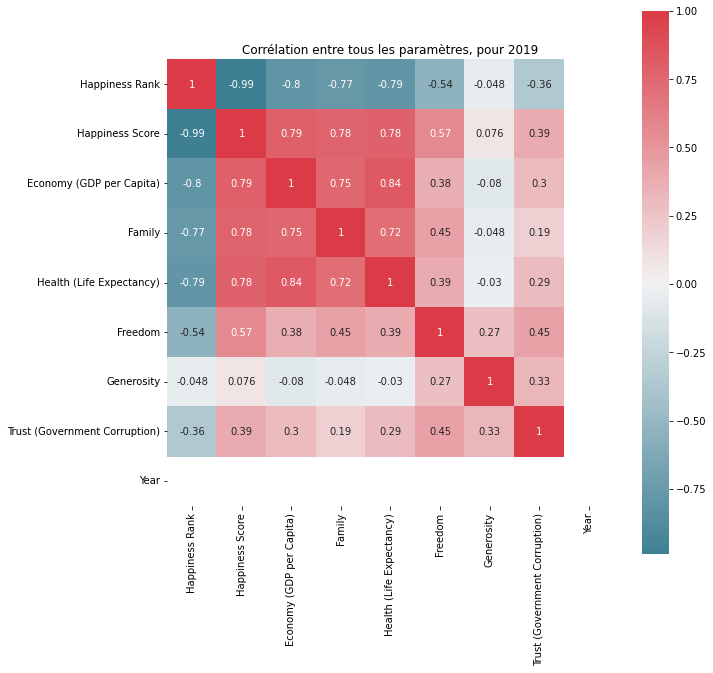

In [33]:
corr = happy2019.corr(method = "pearson")

f, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(corr, annot = True,mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)

plt.title('Corrélation entre tous les paramètres, pour 2019')

Les corrélations semblent relativement semblables en fonction des années bien que la générosité semble être de moins en moins importante dans la détermination du score de bonheur. Les principaux facteurs de calcul du score de bonheur sont donc le PIB par capitale, l'espérance de vie et le nombre d'enfant par famille. La définition du score de bonheur est donc cohérente avec la définition que l'on connaît de celui-là.

# World Population Dataset

---



The world population dataset give the evolution of population by country beetween 1970 and 2022 with also the area of country and growth rate. A typical work could be to analyse the dataset, try to build prediction and cross validate the Population growth rate beetween country.

In [34]:
df_world = pd.read_csv('world_population.csv')

In [35]:
df_world.head()

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


Tout d'abord nous souhaitons visualiser le nombre de pays par continent :

Text(84.375, 0.5, 'No. of Countries')

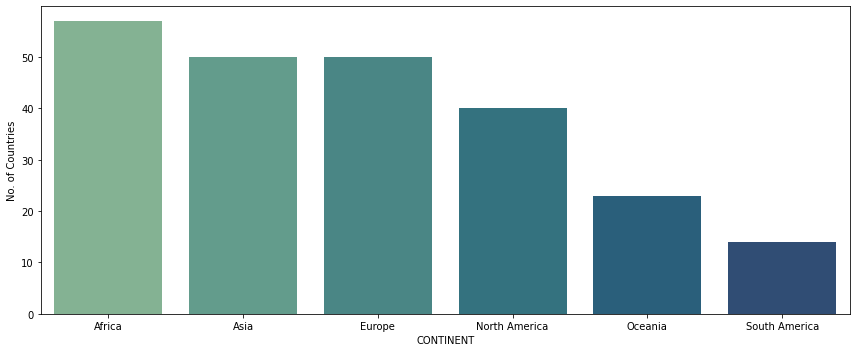

In [36]:
#Total number of contries in a continent

plt.figure(figsize= (12,5))
sns.countplot(x = 'Continent', data = df_world.sort_values(by = 'Continent', ascending = True), palette= 'crest')
plt.tight_layout()
plt.xlabel('CONTINENT')
plt.ylabel('No. of Countries')

In [37]:
df_world['Continent'].value_counts()

Africa           57
Asia             50
Europe           50
North America    40
Oceania          23
South America    14
Name: Continent, dtype: int64

On observe que l'Afrique est le continent ayant le plus de pays (57) alors que l'amérique du Sud ne compte que 14 pays.

---



Maintenant interessons nous, à la population moyenne par 
continent :

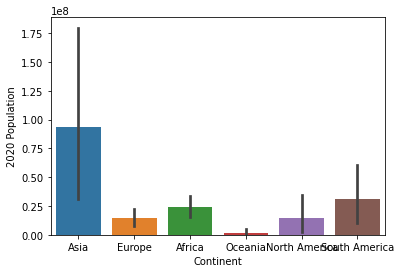

In [38]:
sns.barplot(data=df_world, x="Continent", y="2020 Population")

On constate que l'Asie est le continent ayant la population moyenne la plus élevée. Elle est 3 fois plus élevée que chaque autre continent. 

Maintenant il semble interesssant de voir le classement des pays avec la plus grande population :

In [39]:
top_10_popworld2020= df_world.groupby('Country')['2020 Population'].sum().sort_values(ascending = False).head(10).reset_index()  
top_10_popworld2020

,Country,2020 Population
0,China,1424929781
1,India,1396387127
2,United States,335942003
3,Indonesia,271857970
4,Pakistan,227196741
5,Brazil,213196304
6,Nigeria,208327405
7,Bangladesh,167420951
8,Russia,145617329
9,Mexico,125998302


Text(0.5, 1.0, 'TOP 10 PAYS AVEC LE PLUS D HABITANTS 2020')

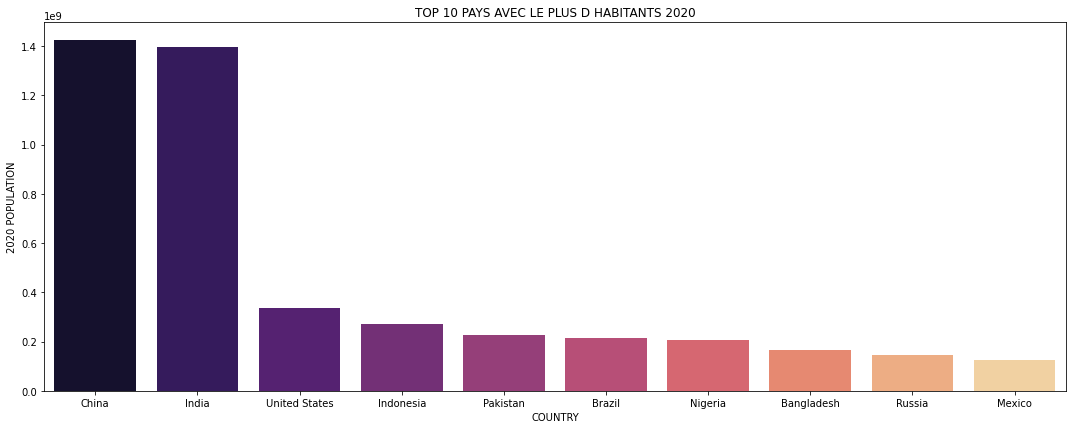

In [40]:
plt.figure(figsize = (15,6))
sns.barplot(x= 'Country', y = '2020 Population', data = top_10_popworld2020, palette = 'magma')
plt.tight_layout()
plt.xlabel('COUNTRY')
plt.ylabel('2020 POPULATION')
plt.title('TOP 10 PAYS AVEC LE PLUS D HABITANTS 2020')

Ainsi on constate que parmi les 10 pays les plus peuplés, 4 pays font partie de l'Asie. De plus la Chine et l'Inde ont chacun quasi plus de 4 fois la population de chaque autre pays dans ce top 10. Cela explique ainsi pourquoi l'Asie a la population moyenne la plus élevée.

Revenons maintenant 50 ans en arrière, afin de voir si les 10 pays les plus peuplés étaient les mêmes :

In [41]:
top_10_popworld1970= df_world.groupby('Country')['1970 Population'].sum().sort_values(ascending = False).head(10).reset_index()  
top_10_popworld1970

,Country,1970 Population
0,China,822534450
1,India,557501301
2,United States,200328340
3,Russia,130093010
4,Indonesia,115228394
5,Japan,105416839
6,Brazil,96369875
7,Germany,78294583
8,Bangladesh,67541860
9,Pakistan,59290872


Text(0.5, 1.0, 'TOP 10 PAYS AVEC LE PLUS D HABITANTS 1970')

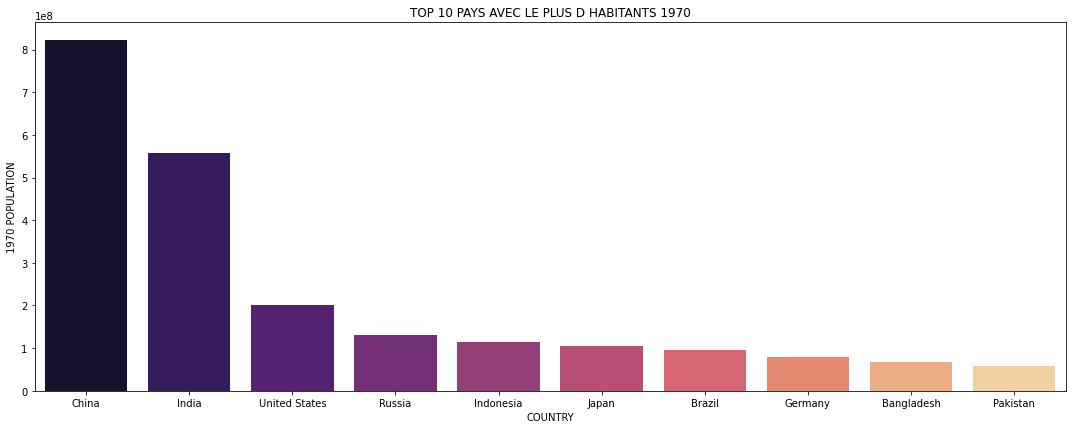

In [42]:
plt.figure(figsize = (15,6))
sns.barplot(x= 'Country', y = '1970 Population', data = top_10_popworld1970, palette = 'magma')
plt.tight_layout()
plt.xlabel('COUNTRY')
plt.ylabel('1970 POPULATION')
plt.title('TOP 10 PAYS AVEC LE PLUS D HABITANTS 1970')

On constate que la Chine et l'Inde reste les 2 pays les plus peuplés, cependant on voit que la Russie est passé du top 4 au top 9 en 50 ans et que l'Allemagne est sorti du top 10. L'Inde a subit la plus forte augmentation étant quasiment au même niveau que la Chine en 2020 alors qu'elle n'avait que deux tiers de la population de la Chine en 1970.

Pour continuer, on s'interesse à la surface par pays en km² pour chaque continent :

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



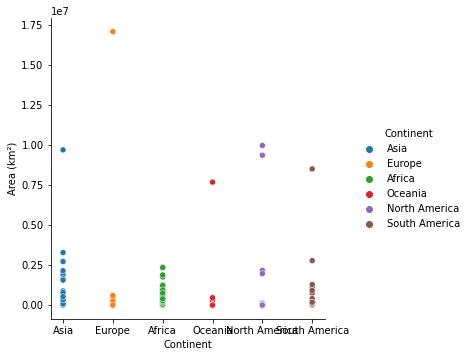

In [43]:
sns.pairplot(data=df_world, size = 5, hue='Continent',
                  x_vars=['Continent'],
                  y_vars=['Area (km²)'])

On constate que l'Europe a le pays ayant la surface la plus grande (la Russie) néanmoins les autres pays sont très regroupés avec une surface plutôt basse par rapport aux autres continents. L'Asie et l'Afrique semblent être les continents avec le plus de pays ayant une surface élevée. Cela est également comparable avec le graphe du nombre de pays par continent : l'Asie et l'Afrique ayant le plus de pays.


---


Par la suite, il est important de voir le taux de croissance par continent:

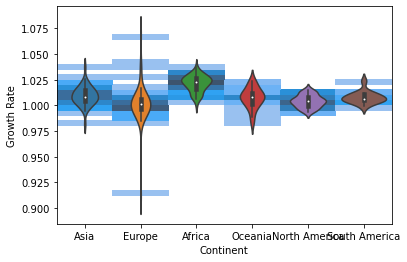

In [44]:
sns.histplot(data=df_world, x='Continent', y='Growth Rate')
sns.violinplot(data=df_world, x='Continent', y='Growth Rate')

On remarque que l'Europe a le taux de croissance le plus inégal entre chaque pays sur ce continent. Cependant c'est l'Afrique qui a le taux de croissance moyen le plus élevée, cela est dû à la transition démographique que réalise le continent ces dernières années, contrairement aux autres continent qui sont plutôt en post transition.


---


Dorénavant, parlons de la densité (par km²) en fonction des continents :

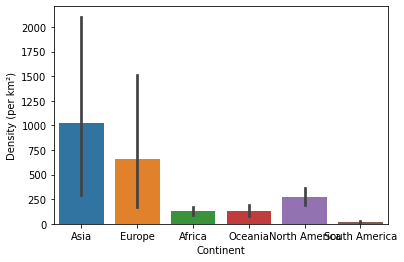

In [45]:
sns.barplot(data=df_world, x='Continent', y='Density (per km²)')

Pour ce graphique, on a la plus grosse densité par km2 pour l'Asie ce qui est cohérent étant donné qu'on a vu que c'est le continent ayant la plus grande population. Au contraire, on voit que pour l'Amérique du Sud la densité est très faible au km² cela semble cohérent car l'amérique du Sud a une grande surface et que 14 pays. De plus l'Amazonie est très grande et peu de personnes y habitent.


---


Pour finir on va analyser la matrice de corrélation des données

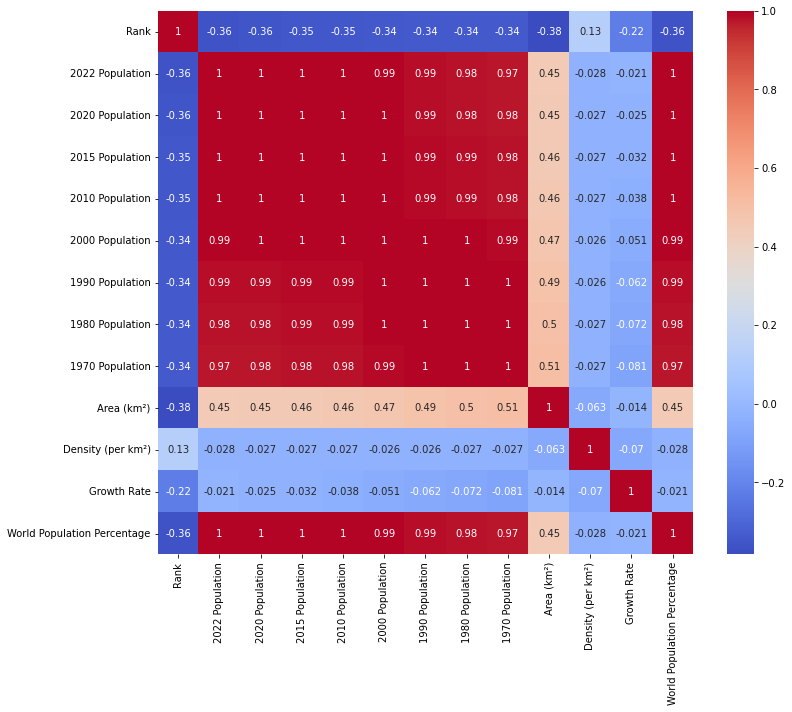

In [46]:
fig = plt.figure(figsize = (12, 10))
sns.heatmap(df_world.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

On constate une très forte corrélation entre les population des différentes années ce qui était prévisible et implique que la croissance par pays semble plutôt linéaire. Néanmoins on ne constate pas de très forte corrélation entre les autres paramètres.

Nous avons ainsi analysé toute les données utiles du fichier world population.
Il est maintenant interessant de croiser les données de cette data avec celles du score happiness dans le monde.

In [47]:
data_hapandpop2020=pd.merge(happy2020,df_world)

Prenons la densité de population par km² et voyons l'impacte que cela pourrait avoir sur le score hapiness.
On utilise les données de 2020 étant donné que celle de 2022 ne sont pas utilisable pour le score happiness et qu'on a pas de donnée sur la population 2021.

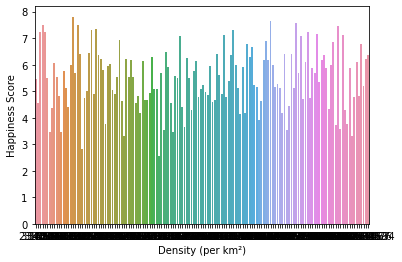

In [48]:
sns.barplot(data=data_hapandpop2020, x='Density (per km²)', y='Happiness Score')

Les pics semblent très répartis et ainsi on ne  constate pas d'influence de la densité de population sur le score d'happiness.

Essayons de voir avec un nuage de points pour voir si l'influence est plus représentative :

In [49]:
fig = px.scatter(data_hapandpop2020, x='Happiness Score', y='Density (per km²)',
                 title='Densité par km² en fonction du score de bonheur', hover_name='Country'
                 )
fig.update(layout_coloraxis_showscale=False)
fig.show()

On constate à nouveau que la densité par km² et le score du bonheur ne sont pas corrélés.

En prenant une année différente (2015) on peut se poser la question d'un changement dans le graphe :


In [50]:
data_hapandpop2015=pd.merge(happy2015,df_world)

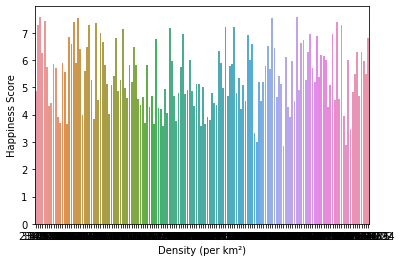

In [51]:
sns.barplot(data=data_hapandpop2015, x='Density (per km²)', y='Happiness Score')

En prenant 2015, on ne constate pas de changement dans l'influence de la densité de population par rapport au happiness score.

# Kaggle survey dataset 

---






The Kaggle survey dataset give some insight of the user of Kaggle. We extract here from 2017-2021 data the features ["Year", "Age", "Gender", "Country", "Education", "Title", "Salary", "Spending"]

In [52]:
!unzip kaggle_survey_2017_2021.zip

Archive:  kaggle_survey_2017_2021.zip
  inflating: kaggle_survey_2017_2021.csv  


In [53]:
# if you want to get header and Questions 
#df_kaggle = pd.read_csv('kaggle_survey_2017_2021.csv',header=[0,1])
#for x in df_kaggle.columns:
#    print(x)

In [54]:
df_kaggle_surv= pd.read_csv('kaggle_survey_2017_2021.csv', skiprows=(1,1) )

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning:

Columns (8,9,10,11,12,13,14,15,16,17,18,19,20,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256

In [55]:
df_kaggle_surv = df_kaggle_surv.rename(columns={'-':'Year'})

In [56]:
df_data = df_kaggle_surv.loc[:,["Year", "Q1", "Q2", "Q3", "Q4", "Q5", "Q25", "Q11"]]
df_data.columns = ["Year", "Age", "Gender", "Country", "Education", "Title", "Salary", "Spending"]
df_data["Country"] = df_data["Country"].str.replace("United Kingdom of Great Britain and Northern Ireland","United Kingdom", regex=False)
df_data["Country"] = df_data["Country"].str.replace("United States of America","United States", regex=False)
df_data["Country"] = df_data["Country"].str.replace("Iran, Islamic Republic of...","Iran", regex=False)
df_data["Country"] = df_data["Country"].str.replace("Republic of Korea","South Korea", regex=False)
df_data["Country"] = df_data["Country"].str.replace("Hong Kong (S.A.R.)","Hong Kong", regex=False)
df_data["Country"] = df_data["Country"].str.replace("People 's Republic of China","China", regex=False)
df_data["Country"] = df_data["Country"].str.replace("Republic of China","China", regex=False)
df_data["Country"] = df_data["Country"].str.replace("I do not wish to disclose my location","Other", regex=False)
df_data["Country"] = df_data["Country"].fillna('Other')

df_data["Country"] = df_data["Country"].str.replace("Viet Nam","Vietnam", regex=False)

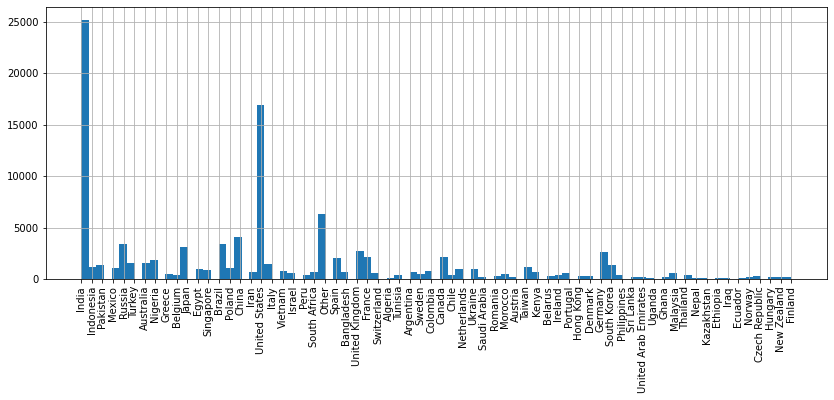

In [57]:
plt.figure(figsize=(14,5))
df_data["Country"].hist(bins = 93)
_= plt.xticks(rotation='vertical')

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



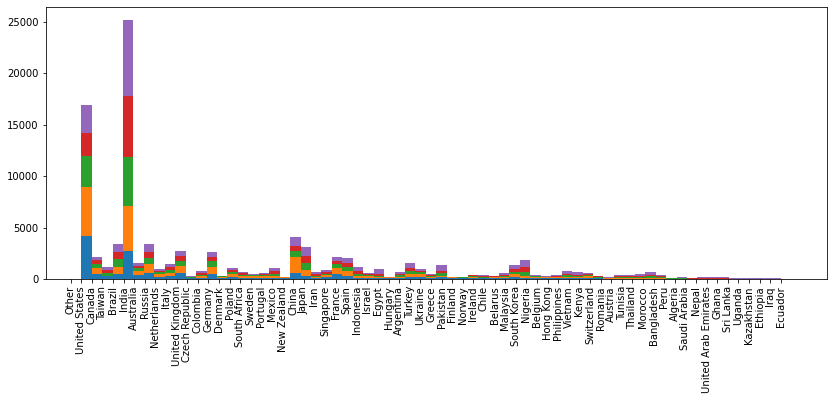

In [58]:
plt.figure(figsize=(14,5))
years = list(df_data['Year'].unique())
years.sort()
tmp = [df_data[df_data["Year"]== y]["Country"] for y in years]

_ = plt.hist(tmp, bins=68, range=(1,68), stacked=True)
_ = plt.xticks(rotation=90)


----------------------

In [59]:
df_data_Sauvegarde = df_data.copy()

df_data["Gender"] = df_data["Gender"].fillna('NR')
df_data["Salary"] = df_data["Salary"].fillna('NR')
df_data["Education"] = df_data["Education"].fillna('NR')
df_data["Title"] = df_data["Title"].fillna('Other')
df_data["Spending"] = df_data["Spending"].fillna('Other')
df_data

,Year,Age,Gender,Country,Education,Title,Salary,Spending
0,2021,50-54,Man,India,Bachelorâ€™s degree,Other,"25,000-29,999",A laptop
1,2021,50-54,Man,Indonesia,Masterâ€™s degree,Program/Project Manager,"60,000-69,999","A cloud computing platform (AWS, Azure, GCP, h..."
2,2021,22-24,Man,Pakistan,Masterâ€™s degree,Software Engineer,$0-999,A laptop
3,2021,45-49,Man,Mexico,Doctoral degree,Research Scientist,"30,000-39,999","A cloud computing platform (AWS, Azure, GCP, h..."
4,2021,45-49,Man,India,Doctoral degree,Other,"30,000-39,999","A cloud computing platform (AWS, Azure, GCP, h..."
...,...,...,...,...,...,...,...,...
106296,2017,22-24,Female,Other,Master's degree,Other,NR,Other
106297,2017,25-29,Male,Indonesia,Bachelor's degree,Programmer,NR,Other
106298,2017,25-29,Female,Taiwan,NR,Other,NR,Other
106299,2017,NaN,Female,Singapore,I prefer not to answer,Other,NR,Other


In [60]:
d = {'Male':'Man','Female':'Woman','Non-binary, genderqueer, or gender non-conforming' : 'Nonbinary', 'A different identity' : 'Nonbinary', 'Prefer not to say' : 'NR', 'Prefer to self-describe':'NR'}
df_data = df_data.replace(d)

-------------------------------

## Début de l'étude sur le dataset du Kaggle survey

Le dataset du Kaggle survey correspond à une enquête mené par Kaggle, qui est une plateforme web organisant des compétitions en science des données appartenant à Google. Cette enquête est tournée sur la communauté de Kaggle afin d'obtenir diverses informations de celle-ci, et de pouvoir les étudier. 

Ce jeu de données comprend donc différentes informations, allant de l'âge, du métier jusqu'au salaire. Nous allons donc étudier une des parties de ce jeu de données délimités par notre encadrant.

Nous allons donc nous concentrer sur l'année, le genre, l'âge, le salaire, le pays, les études, leurs jobs, et leurs équipements personels.

-------------------------------

### Nombre de participants par année en fonction du genre

Un des points importants à mettre en avant est la parité existante ou non dans la communauté de Kaggle. En effet, comme première, l'étude de la répartition des genres est cruciale pour mieux comprendre une communauté.

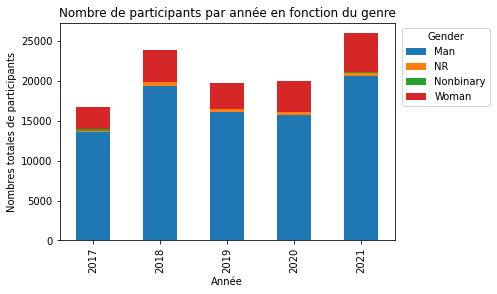

In [61]:
# Nombre de participants par année en fonction du genre
df_data.groupby(['Year','Gender']).size().unstack().plot(kind='bar',stacked=True)

plt.title("Nombre de participants par année en fonction du genre")
plt.xlabel("Année")
plt.ylabel("Nombres totales de participants")
plt.legend(title = "Gender", bbox_to_anchor=(1.3, 1), loc='upper right')
plt.show()

Constat : Nous pouvons mettre en avant 2 constats.
- On peut voir que dans la communauté de KAGGLE, les personnes participants sont majortairements des hommes, au détriment de la 
présense féminime. 
En effet, différents stéréotypes parcourt les années, et qui énonce que les hommes sont plus doués dans les domaines scientifiques, que les femmes, ce qui influence ces résultats. De plus, dans différents pays, les femmes n'ont pas accès à la même éducation que les hommes. 
- On peut voir également que la communauté de KAGGLE ne cesse d'augmenter au fil des années. Malgré tout, lors de la période du Covid, l'avancée a chuté du au faite que les individues ne se sentaient pas autant concerné par leur travail lors du confinement, et la volonté de s'éloigner des écrans.

Poussons notre recherche plus loin sur le thème du genre des individus de la communauté de KAGGLE.

Elaborons un diagramme circulaire afin de voir plus précisément la répartion des genres dans la communauté de KAGGLE sur l'ensemble des années que nous possédons.

In [62]:
genders = pd.DataFrame(df_data['Gender'].value_counts())
genders.reset_index(inplace=True)
genders.columns = ["Gender", "Count"]

In [63]:
fig = px.pie(genders, values = 'Count', names = 'Gender', title = 'Distribution des genres dans la communauté de KAGGLE')
fig.show()

Constat : 
- On remarque donc grâce à ce second graphe, notre première constatation. Les hommes représentent 80% de la communauté de Kaggle, ce qui est énorme avec un total d'un peu moins 86000 hommes.

En conclusion, les participants de l'enquête sont majoritairement des hommes, ce qui est assez logique d'après les arguments énoncés plus haut. La véritable question qui se pose par la suite est : "Est-ce que d'autres vérités connues sont visibles par l'étude de ces données ?".

Pour répondre à cette question, oriontons-nous sur l'âge des participants.

---------------------------

### Etude sur l'âge des participants

Dans cette partie, nous allons donc mettre en avant l'étude de l'âge des participants ayant participé à cette enquête.

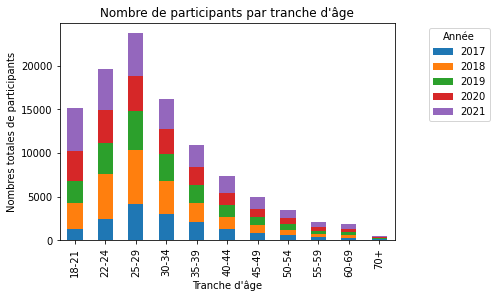

In [64]:
# Graphe permettant d'obtenir le nombre d'individue par tranche d'âge et année
df_data.groupby(['Age','Year']).size().unstack().plot(kind='bar',stacked=True)

plt.title("Nombre de participants par tranche d'âge")
plt.xlabel("Tranche d'âge")
plt.ylabel("Nombres totales de participants")
plt.legend(title = "Année", bbox_to_anchor=(1.3, 1), loc='upper right')
plt.show()

Constat : 
- Nous pouvons voir que la tranche d'âge majoritaire ayant répondu à l'enquête est la tranche des 20-30 ans. En effet, cela est une nouvelle fois logique, car KAGGLE relie une communauté où la compéttion prime. Ainsi, les jeunes, qui sont plus dynamiques, sont plus enclin à particper, afin de découvrir de nouveau procédés, et d'acquérir des compétences. De plus, ce sont la première génération ayant grandi avec les nouvelles technologies qui ont été rendu plus accessible. Donc en reliant l'ensemble de ces arguments, le résultat parait logique.
- Nous pouvons également voir que la plus grande hausse à eu lieu en 2018 pour la tranche 25-29, ce qui était visible ultérieurement sur la graphe de participation en fonction de l'année et du genre. 


Afin de pouvoir mesurer précisément le nombre de participant pour chaque tranche d'âge, utilisons un graphe px.

In [65]:
age = pd.DataFrame(df_data['Age'].value_counts())
age.sort_index(inplace=True)
age.reset_index(inplace=True)
age.columns = ["Age", "Count"]

fig = px.bar(data_frame=age, x = "Age", y = "Count", title= "Nombre de participants par tranche d'âge",template="seaborn")
fig.update_layout(title_x=0.5)

Constat : La communauté la plus active de Kaggle et ayant répondu à ce sondage sont les individues se situant dans la vingtaine, et représentant ainsi plus de 40000 participations à eux seules, ce qui correspond presque à la moitié de cette enquête sur 5 ans.

Pour conclure, la communauté majoritaire en reliant l'ensemble des informations est une communautés d'hommes qui sont dans une tranche de 20 à 30 ans. Ainsi, étudions les salaires de cette communauté qui pour une grande partie viennent d'entrer dans le monde du travail.

---------------------

### Etude du salaire de la communauté de KAGGLE

Nous allons donc tracer et compter pour chaque tranches de salaires, afin de voir les salaires se distinguant dans la communauté de KAGGLE.

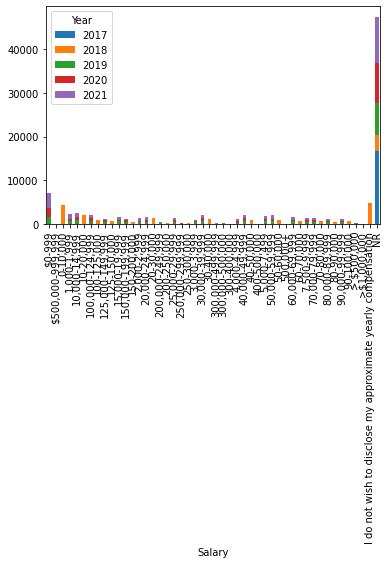

In [66]:
df_data.groupby(['Salary','Year']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

Constat :     
- Nous pouvons voir si nous ne prenons pas en compte les valeurs 'NR' qui correspond aux valeurs non renseignés, que majoritairement, les personnes ne veulent soit pas déclarer leurs salaires, soit il gagne aux alentours de 1000 par mois. 
- De plus, malgré tout, il y a des salaires assez variés dans toute la communauté.

Pour conclure, il est assez difficile d'extraire une information pertinente de ce graphique. En effet, comme le salaire peut varier en fonction des pays et de l'âge, il est difficile de décoder ce que nous avions supposer ultérieurement. Nous ne pouvons pas savoir si il y a majoritairement des salaires peu élevés car la communauté majoritaire est assez jeunes. Malgré tout, nous pouvons orienter notré étude sur les jobs que la communautés possèdent.

---------------------------------

### Quelles sont les jobs que la communauté de KAGGLE excerce ? 

Ainsi, comme le salaire ne nous a apporté aucune information pertinente dans notre étude, orientons-nous sur leur métier.

Nous allons donc tracer un diagramme circulaire afin de pouvoir illustrer les jobs mis en avant par la communauté de KAGGLE.

In [67]:
jobs = pd.DataFrame(df_data['Title'].value_counts())
jobs.reset_index(inplace=True)
jobs.columns = ["Title", "Count"]

In [68]:
fig = px.pie(jobs, values = 'Count', names = 'Title', title = 'Distribution des jobs de la communauté KAGGLE')
fig.show()

Constat : 
- Nous pouvons voir que deux métiers (ou activités) sont mis en avant, on a les étudiants (20%) et les Data Scientist (15.9%).
En effet, lorsque nous avions aborder les graphiques sur l'âge nous avions mis cette hypothèse en avant, et elle est vérifiée. Nous avons majoritairement des étudiants qui acquiert des connaissances et des techniques en travaillant sur KAGGLE, ils représentent la moitié des 40000 de la tranche des 20-30 ans. De plus, il est assez logiques de retomber sur les Data Scientist, car Kaggle est lié très étroitement à l'univers de la data et du machine learning. 

Pour conclure, ce graphique des métiers a permis de renforcer notre hypothèses et de mieux comprendre la communauté de KAGGLE.

------------------------

### Etude des études scolaires réalisés par la communauté de KAGGLE


Pour la communauté de KAGGLE qui est une communauté orienté dans les domaines informatiques et scientifiques, il est important de voir si leurs études sont liés à cette univers.

Nous allons donc tracer un diagramme circulaire mettant en avant les études réalisés par cette communauté.

In [69]:
educations = pd.DataFrame(df_data['Education'].value_counts())
educations.reset_index(inplace=True)
educations.columns = ["Education", "Count"]

In [70]:
fig = px.pie(educations, values = 'Count', names = 'Education', title = 'Distribution des études réalisés par la communauté de KAGGLE')
fig.show()

Constat :    
- Nous pouvons voir que les 3 études mises en avant sont : Doctorat, Master et Bachelor, qui sont des études assez poussées et qui correspondent bien aux métiers vue plus haut de Data Scientist, mais également des autres métiers comme le Software Engineering. 


En conclusion, cela montre bien l'impact des études, dans le travail future des individus, et dans l'utilisation de KAGGLE. Nous pouvons donc nous demander quel est leur matériel informatique pour réaliser leurs travaux.

-----------------------------

### Quelles sont les outils que la communauté de KAGGLE met en avant ?

Nous cherchons donc les outils informatiques pour voir lesquelles sont mis en avant. Pour cela nous allons de nouveau tracer un diagramme circulaire.

In [71]:
spending = pd.DataFrame(df_data['Spending'].value_counts())
spending.reset_index(inplace=True)
spending.columns = ["Spending", "Count"]

In [72]:
fig = px.pie(spending, values = 'Count', names = 'Spending', title = 'Distribution des outils informatiques de la communauté KAGGLE')
fig.show()

Constat :    
- Nous pouvons voir que majoritairement les individus utilsent un laptop à 15.3% ou un PC à 12.6%. 
- De plus, la catégorie Other est mise en avant ici (à hauteur de 61.1%) due au fait que certaines informations n'étaient pas renseignés et que nous les avons mise ici. De plus, ils peuvent également utiliser plusieurs types d'outils, d'où le faite qu'ils se retrouvent dans cette catégorie.

En conclusion, même si ce point parraissait
assez logique, la communauté de KAGGLE a à disposition du matériel et des outils informatiques.

-------------------------

### Nombre d'utilisateur de KAGGLE en fonction du pays

In [73]:
countries = pd.DataFrame(df_data['Country'].value_counts())
countries.reset_index(inplace=True)
countries.columns = ["Country", "Count"]

px.choropleth(data_frame=countries, 
              locations='Country', 
              locationmode='country names', 
              color='Count', 
              template="seaborn",
              title="Nombre d'utilisateur dans chaque pays")

Constat : On remarque que dans les zones désertiques, mais également en Afrique, que la communauté de Kaggle est très peu présente. Alors que dans les pays développés disposant de bonnes connexions et de moyens d'apprentissage informatique, on retrouve un nombre élevé de participants. Une des plus grandes communautés est la communauté indienne, en effet cette communauté est très investie dans le codage avec un excellent niveau.

Afin de confirmer notre constat, voyons le top 10 des pays utilisant le plus Kaggle et le top 10 l'utilisant le moins.

In [74]:
countries = pd.DataFrame(df_data['Country'].value_counts())
countries.reset_index(inplace=True)
countries.columns = ["Country", "Count"]

In [75]:
dfCountryPlusUtilisateurs = countries.sort_values(by = 'Count', ascending = False)[0:11].reset_index()
px.bar(dfCountryPlusUtilisateurs, x = 'Country', y = 'Count', title="TOP 10 : Pays utilisant le plus KAGGLE ")

In [76]:
dfCountryMoinsUtilisateurs = countries.sort_values(by = 'Count', ascending = False)[len(countries)-10:len(countries)].reset_index()
px.bar(dfCountryMoinsUtilisateurs, x = 'Country', y = 'Count', title="TOP 10 : Pays utilisant le moins KAGGLE ")

Conclusion : Ainsi, notre théorie est vérifié. Les pays ayant utilisant le plus KAGGLE sont des pays développés ou en voie de dévelopement, avec une éducation dans le domaine informatique assez poussé et disposant de moyens afin de réaliser cette éducation. Dans le cas opposé, les pays les moins avancés ou ne se focalisant pas sur l'apprentissage de l'informatique ont une utilisation moindre de KAGGLE.

-----------------------

## Corrélation 

Traçons la carte des corrélations de notre dataframe.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



Text(0.5, 1.0, 'Corrélation entre tous les paramètres')

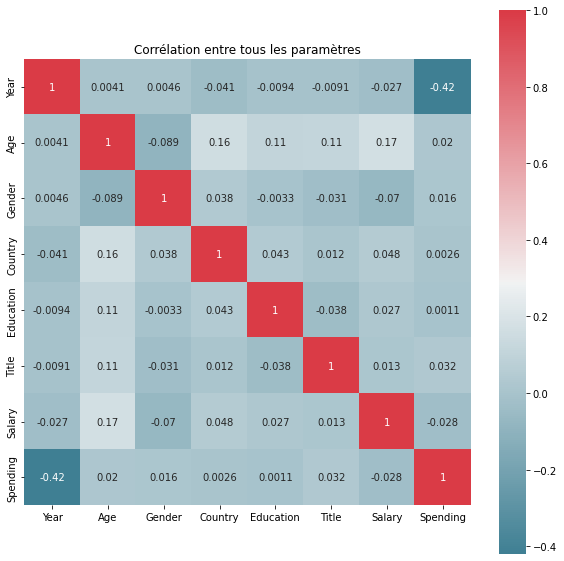

In [77]:
dfCorrelation = df_data_Sauvegarde.copy()

# On retire toutes les valeurs NaN
dfCorrelation = dfCorrelation.dropna()

# On convertie en category les string car sinon nous pouvons pas réaliser la carte
dfCorrelation['Age']=dfCorrelation['Age'].astype('category').cat.codes
dfCorrelation['Gender']=dfCorrelation['Gender'].astype('category').cat.codes
dfCorrelation['Country']=dfCorrelation['Country'].astype('category').cat.codes
dfCorrelation['Education']=dfCorrelation['Education'].astype('category').cat.codes
dfCorrelation['Title']=dfCorrelation['Title'].astype('category').cat.codes
dfCorrelation['Salary']=dfCorrelation['Salary'].astype('category').cat.codes
dfCorrelation['Spending']=dfCorrelation['Spending'].astype('category').cat.codes

corr = dfCorrelation.corr(method = "pearson")

f, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(corr, annot = True,mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)

plt.title('Corrélation entre tous les paramètres')

Constat :     
- On peut voir que malgré notre cheminement de pensée élaboré tout du long, que le résultat attendus est complétement différent de celui supposé. En effet, nous n'avons presque aucune corrélation entre les données. 

-----------------------------------------------

## CLUSTER

Nous allons réaliser un cluster malgré que nos données ne sont pas corrélés afin de voir plus précisément l'impact du corrélement sur un jeu de donnée.

In [78]:
dfCluster = df_data.copy() 

In [79]:
dfCluster_shuffled = dfCluster.sample(frac=1).reset_index(drop=True)
dfCluster_shuffled = dfCluster_shuffled[0:10000]

In [80]:
!pip install umap-learn
import umap
reducer = umap.UMAP()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 3.4 MB/s 
     |████████████████████████████████| 1.1 MB 46.8 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=51a93ee8f97a2c3306a45ee2a0564b53083b7ccd9e2a44b43c1a43a13cba6423
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=d66d88a709c6f940b6ce30c2027687145a6e44f5fe7e542cdd8b44c98d6e98aa
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f574db3113513696b98f3f9b51f496c
Successfully built umap-learn pynndescent


In [81]:
d = {'25,000-29,999':'30000','60,000-69,999':'70000','$0-999' : '1000', '30,000-39,999' : '40000', '15,000-19,999' : '20000', '70,000-79,999' : '80000', '2,000-2,999':'3000','10,000-14,999':'15000','5,000-7,499' : '7500', '20,000-24,999' : '25000', '1,000-1,999' : '2000', '100,000-124,999' : '125000','7,500-9,999':'10000','4,000-4,999' : '5000', '40,000-49,999' : '50000', '50,000-59,999' : '60000', '3,000-3,999' : '4000', '300,000-499,999':'500','200,000-249,999':'250','125,000-149,999' : '150', '250,000-299,999' : '300', '80,000-89,999' : '90000', '90,000-99,999' : '100000', '150,000-199,999' : '200000', '>$1,000,000' : '1000000', '$500,000-999,999' : '1000', '> $500,000' : '500', '300,000-500,000' : '500', '10-20,000' : '20000', '0-10,000' : '10000', 'I do not wish to disclose my approximate yearly compensation' : '0', '20-30,000' : '30000', '125-150,000' : '150000', '30-40,000' : '40000', '50-60,000' : '60000', '100-125,000' : '125000', '90-100,000' : '100000', '70-80,000' : '80000', '80-90,000' : '90000', '60-70,000' : '70000', '400-500,000' : '500000', '40-50,000' : '50000', '150-200,000' : '200000', '500,000+' : '500000', '300-400,000' : '400000', '200-250,000' : '250000', '250-300,000' : '300000', 'NR' : '0'}
dfCluster_shuffled = dfCluster_shuffled.replace(d)
dfCluster_shuffled = dfCluster_shuffled.rename(columns = {'Salary': 'Max_Salary'})
dfCluster_shuffled["Max_Salary"] = dfCluster_shuffled["Max_Salary"].astype(int)

In [82]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

dfCluster_shuffled['Age'] = le.fit_transform(dfCluster_shuffled['Age'])
dfCluster_shuffled['Country'] = le.fit_transform(dfCluster_shuffled['Country'])
dfCluster_shuffled['Education'] = le.fit_transform(dfCluster_shuffled['Education'])
dfCluster_shuffled['Title'] = le.fit_transform(dfCluster_shuffled['Title'])
dfCluster_shuffled['Spending'] = le.fit_transform(dfCluster_shuffled['Spending'])

In [83]:
dfCluster_shuffled["Gender"] = dfCluster_shuffled["Gender"].astype(str)
dfCluster_shuffled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        10000 non-null  int64 
 1   Age         10000 non-null  int64 
 2   Gender      10000 non-null  object
 3   Country     10000 non-null  int64 
 4   Education   10000 non-null  int64 
 5   Title       10000 non-null  int64 
 6   Max_Salary  10000 non-null  int64 
 7   Spending    10000 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 625.1+ KB


In [84]:
dfClustering = dfCluster_shuffled[
    [
        "Age",
        "Country",
        "Max_Salary",
        "Education",
        "Title",
        "Spending"
    ]
].values
scaled_dfCluster = StandardScaler().fit_transform(dfClustering)

In [85]:
embedding = reducer.fit_transform(scaled_dfCluster)
embedding.shape

(10000, 2)

In [86]:
import plotly.io as pio
pio.renderers.default = "colab"

Text(0.5, 1.0, 'UMAP Projection du dataset Kaggle')

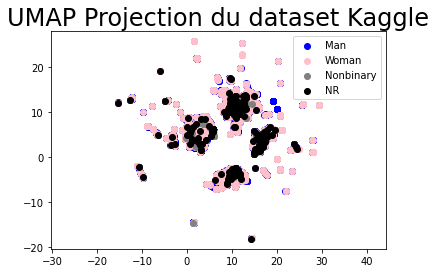

In [87]:
c = dfCluster_shuffled.Gender.map({"Man" : 0, "Woman" : 1, "Nonbinary" : 2, '0' : 3})

embeddingMan = []
embeddingWoman = []
embeddingNonbinary = []
embedding0 = []

for i in range(1,len(c)):
  if c[i] == 0:
    embeddingMan += [ [embedding[i][0],embedding[i][1]] ]
  if c[i] == 1:
    embeddingWoman += [ [embedding[i][0],embedding[i][1]] ]
  if c[i] == 2:
    embeddingNonbinary += [ [embedding[i][0],embedding[i][1]] ]
  if c[i] == 3:
    embedding0 += [ [embedding[i][0],embedding[i][1]] ]

embeddingMan = np.array(embeddingMan)
embeddingWoman = np.array(embeddingWoman)
embeddingNonbinary = np.array(embeddingNonbinary)
embedding0 = np.array(embedding0)

scatterMan = plt.scatter(embeddingMan[:,0], embeddingMan[:,1], c="blue")
scatterWoman = plt.scatter(embeddingWoman[:,0], embeddingWoman[:,1], c="pink")
scatterNonbinary = plt.scatter(embeddingNonbinary[:,0], embeddingNonbinary[:,1], c="grey")
scatter0 = plt.scatter(embedding0[:,0], embedding0[:,1], c="black")

plt.legend([scatterMan, scatterWoman,scatterNonbinary, scatter0], ["Man", "Woman", "Nonbinary", 'NR'])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP Projection du dataset Kaggle', fontsize=24)

Cela conclut bien la map de corrélation, on peut voir lors du clustering que nous n'avons pas de corrélation entre nos données.

--------------------------------

## Conclusion :


On peut supposer que l'étude s'étant reposé sur un grand nombre de pays, qui ont des cultures et des vies très différentes a eu un impact assez important sur notre jeu de données. Nous n'avons aucune corrélation entre chaque lien. Afin de remédier à ce problème, il faudrait prendre un échantillon encore plus élevé ou se concentrer sur des pays qui ont un mode de vie assez semblable.

Malgré tout, en réalisant une étude séparé de chaque colonne, nous pouvons déduire des informations.

----------------------------

--------------------------------------

# Etude sur les différents jeux de données liés

## Existe-t-il un lien entre la participation au kaggle et le bonheur du pays ?

Dans le cadre de cette question prenons l'année 2020.


In [88]:
df_data2020 = df_data.loc[df_data["Year"] == 2020]
df_data2020.head()

,Year,Age,Gender,Country,Education,Title,Salary,Spending
25973,2020,35-39,Man,Colombia,Doctoral degree,Student,NR,"A cloud computing platform (AWS, Azure, GCP, h..."
25974,2020,30-34,Man,United States,Masterâ€™s degree,Data Engineer,"100,000-124,999",A personal computer or laptop
25975,2020,35-39,Man,Argentina,Bachelorâ€™s degree,Software Engineer,"15,000-19,999",A personal computer or laptop
25976,2020,30-34,Man,United States,Masterâ€™s degree,Data Scientist,"125,000-149,999","A cloud computing platform (AWS, Azure, GCP, h..."
25977,2020,30-34,Man,Japan,Masterâ€™s degree,Software Engineer,NR,Other


In [89]:
df_data2020 = df_data2020.merge(happy2020, on = 'Country')

In [90]:
df_data2020.head()

,Year_x,Age,Gender,Country,Education,Title,Salary,Spending,Region,Happiness Score,...,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Happiness Rank,Year_y
0,2020,35-39,Man,Colombia,Doctoral degree,Student,NR,"A cloud computing platform (AWS, Azure, GCP, h...",Latin America and Caribbean,6.1634,...,1.972317,0.932204,1.334451,0.81002,0.52689,0.092374,0.045848,2.421657,44,2020
1,2020,55-59,Man,Colombia,Masterâ€™s degree,Data Scientist,"40,000-49,999",A personal computer or laptop,Latin America and Caribbean,6.1634,...,1.972317,0.932204,1.334451,0.81002,0.52689,0.092374,0.045848,2.421657,44,2020
2,2020,18-21,Man,Colombia,Some college/university study without earning ...,Student,NR,Other,Latin America and Caribbean,6.1634,...,1.972317,0.932204,1.334451,0.81002,0.52689,0.092374,0.045848,2.421657,44,2020
3,2020,25-29,Man,Colombia,Professional degree,Data Analyst,"10,000-14,999",A personal computer or laptop,Latin America and Caribbean,6.1634,...,1.972317,0.932204,1.334451,0.81002,0.52689,0.092374,0.045848,2.421657,44,2020
4,2020,45-49,Man,Colombia,Masterâ€™s degree,Business Analyst,"40,000-49,999",A personal computer or laptop,Latin America and Caribbean,6.1634,...,1.972317,0.932204,1.334451,0.81002,0.52689,0.092374,0.045848,2.421657,44,2020


In [91]:
dfLien = pd.DataFrame(df_data2020['Happiness Score'].value_counts())
dfLien.reset_index(inplace=True)
dfLien.columns = ["Happiness Score", "Count"]

In [92]:
fig = px.scatter(dfLien, x='Happiness Score', y='Count', 
                 color = 'Count',
                 title='Courbe du score de joie en fonction de la participation sur KAGGLE', hover_name='Count',
                 trendline="ols")
fig.update(layout_coloraxis_showscale=False)
fig.show()

Constat : On a un R² inférieur à 0.1. On peut donc voir qu'il n'y a pas de corrélation entre la participation sur KAGGLE et le bonheur dans ce cas présent. Cela est due au faite que nous avons deux outliers qui fausse nos données. 

Nous allons donc enlever les deux outliers de ce jeu.

In [93]:
dfLien = dfLien[2:len(dfLien)]
dfLien.head()

,Happiness Score,Count
2,6.3756,694
3,5.8708,638
4,5.5460,582
5,7.1645,489
6,4.7241,476


In [94]:
fig = px.scatter(dfLien, x='Happiness Score', y='Count', 
                 color = 'Count',
                 title='Courbe du score de joie en fonction de la participation sur KAGGLE', hover_name='Count',
                 trendline="ols")
fig.update(layout_coloraxis_showscale=False)
fig.show()

Constat : Nous n'avons pas d'amélioration dans notre graphique sur le sujet de la corrélation.

Conclusion : La participation sur KAGGLE et le score de joie ne sont pas corrélées.

----------------------------------------------


## Existe-t-il un lien entre le salaire énoncé sur kaggle et le bonheur du pays ?

In [95]:
dfMaxSalary = df_data.copy() 
dfMaxSalary2020 = dfMaxSalary.loc[dfMaxSalary["Year"] == 2020]
d = {'25,000-29,999':'30000','60,000-69,999':'70000','$0-999' : '1000', '30,000-39,999' : '40000', '15,000-19,999' : '20000', '70,000-79,999' : '80000', '2,000-2,999':'3000','10,000-14,999':'15000','5,000-7,499' : '7500', '20,000-24,999' : '25000', '1,000-1,999' : '2000', '100,000-124,999' : '125000','7,500-9,999':'10000','4,000-4,999' : '5000', '40,000-49,999' : '50000', '50,000-59,999' : '60000', '3,000-3,999' : '4000', '300,000-499,999':'500','200,000-249,999':'250','125,000-149,999' : '150', '250,000-299,999' : '300', '80,000-89,999' : '90000', '90,000-99,999' : '100000', '150,000-199,999' : '200000', '>$1,000,000' : '1000000', '$500,000-999,999' : '1000', '> $500,000' : '500', '300,000-500,000' : '500', '10-20,000' : '20000', '0-10,000' : '10000', 'I do not wish to disclose my approximate yearly compensation' : '0', '20-30,000' : '30000', '125-150,000' : '150000', '30-40,000' : '40000', '50-60,000' : '60000', '100-125,000' : '125000', '90-100,000' : '100000', '70-80,000' : '80000', '80-90,000' : '90000', '60-70,000' : '70000', '400-500,000' : '500000', '40-50,000' : '50000', '150-200,000' : '200000', '500,000+' : '500000', '300-400,000' : '400000', '200-250,000' : '250000', '250-300,000' : '300000', 'NR' : '0'}
dfMaxSalary2020 = dfMaxSalary2020.replace(d)
dfMaxSalary2020 = dfMaxSalary2020.rename(columns = {'Salary': 'Max_Salary'})
dfMaxSalary2020["Max_Salary"] = dfMaxSalary2020["Max_Salary"].astype(int)

In [96]:
dfMaxSalary2020 = dfMaxSalary2020.merge(happy2020, on = 'Country')

In [97]:
dfLien2 = dfMaxSalary2020.groupby('Happiness Score').mean()['Max_Salary'].reset_index()
fig = px.scatter(dfLien2, x = 'Happiness Score', y = 'Max_Salary',color = 'Max_Salary', title="Lien entre le score de joie et le salaire maximun",trendline="ols")
fig.update(layout_coloraxis_showscale=False)
fig.show()

Constat : Nous pouvons voir que nous avons un R² presque égal à 0.7. Hors dans le cadre de cette étude nous avons pris le salaire maximun fournies dans la tranche de salaire du jeux de données ce qui a pu enlever un peu de corrélation aux données, ici représenter. 

Conclusion :
Nous pouvons docn conclure qu'il existe un réel lien entre le score du bonheur et le salaire gagné. 

---------------------------------------

# Cluster du dataset de joie sur l'année 2020

Regardons pour l'année 2020 la possibilité de faire un cluster.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


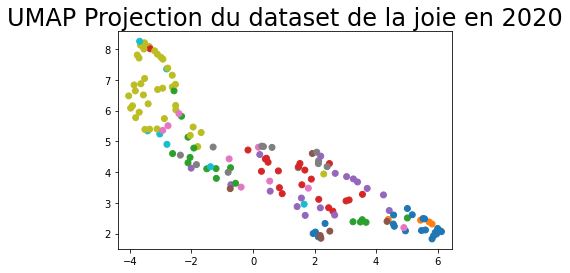

In [98]:
dfCluster = happy2020.copy() 

!pip install umap-learn
import umap
reducer = umap.UMAP()

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

dfCluster['Happiness Score'] = le.fit_transform(dfCluster['Happiness Score'])
dfCluster['Economy (GDP per Capita)'] = le.fit_transform(dfCluster['Economy (GDP per Capita)'])
dfCluster['Health (Life Expectancy)'] = le.fit_transform(dfCluster['Health (Life Expectancy)'])
dfCluster['Family'] = le.fit_transform(dfCluster['Family'])

df = dfCluster[
    [
        "Happiness Score", 
        "Economy (GDP per Capita)",
        "Health (Life Expectancy)",
        "Family"
    ]
].values
scaled_data = StandardScaler().fit_transform(df)

embedding = reducer.fit_transform(scaled_data)
embedding.shape

import plotly.io as pio
pio.renderers.default = "colab"

plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in dfCluster.Region.map({"Western Europe" : 0, "North America and ANZ" : 1, "Middle East and North Africa" : 2, 'Latin America and Caribbean' : 3, 'Central and Eastern Europe' : 4, 'East Asia':5,'Southeast Asia':6, 'Commonwealth of Independent States':7, 'Sub-Saharan Africa':8, 'South Asia':9})])

plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP Projection du dataset de la joie en 2020', fontsize=24)
lines = ax.plot(dfCluster.Region)
ax.legend(lines)

- Bleu = Western Europe
- Orange = North America and ANZ
- Vert = Middle East and North Africa
- Rouge = Latin America and Caribbean
- Violet = Central and Eastern Europe
- Marron = East Asia
- Rose = Southeast Asia
- Gris = Commonwealth of Independent States
- Doré = Sub-Saharan Africa
- Cyan = South Asia

On peut voir deux blocs qui se distinguent : un bloc contenant les régions qui sont développés et un bloc contenant les régions en voie de développement et plus éloigné les régions avec les pays les moins avancés.

En conclusion, il y a lien direct entre le bonheur, la santé, la famille et l'économie avec le lieu et la région dans laquelle il se situe.

-------------------------

# Make a clustering of the country by years

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Text(0.5, 1.0, 'Clustering des pays en fonction des années (dataset joie)')

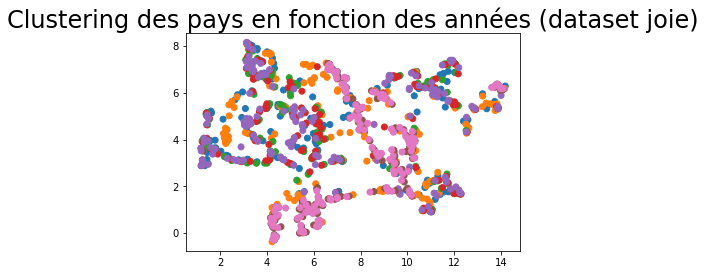

In [100]:
# Make a clustering of the country by years

dfCluster = happytot.copy() 

!pip install umap-learn
import umap
reducer = umap.UMAP()

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

dfCluster['Happiness Score'] = le.fit_transform(dfCluster['Happiness Score'])
dfCluster['Economy (GDP per Capita)'] = le.fit_transform(dfCluster['Economy (GDP per Capita)'])
dfCluster['Health (Life Expectancy)'] = le.fit_transform(dfCluster['Health (Life Expectancy)'])
dfCluster['Family'] = le.fit_transform(dfCluster['Family'])
dfCluster['Country'] = le.fit_transform(dfCluster['Country'])

dfCluster["Year"] = dfCluster["Year"].astype(str)

df = dfCluster[
    [
        "Happiness Score", 
        "Economy (GDP per Capita)",
        "Health (Life Expectancy)",
        "Family",
        "Country"
    ]
].values
scaled_data = StandardScaler().fit_transform(df)

embedding = reducer.fit_transform(scaled_data)
embedding.shape

import plotly.io as pio
pio.renderers.default = "colab"

plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in dfCluster.Year.map({"2015" : 0, "2016" : 1, "2017" : 2, '2018' : 3, '2019' : 4, '2020':5,'2021':6, '2022':7})])

plt.gca().set_aspect('equal', 'datalim')
plt.title('Clustering des pays en fonction des années (dataset joie)', fontsize=24)

- Bleu = 2015
- Orange = 2016
- Vert = 2017
- Rouge = 2018
- Violet = 2019
- Marron = 2020
- Rose = 2021
- Gris = 2022



On peut voir que ceratines couleurs sont regroupés, donc certaines années sont liés. 


----------------------------------------------------

----------------------------------------------------------